In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=UserWarning)
np.random.seed(42)

In [50]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [51]:
X_raw = tips[["total_bill","size", "day"]]
y = tips["tip"]

In [52]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(tips[["day"]])
ohe

OneHotEncoder()

In [53]:
encoded_day = ohe.transform(tips[["day"]]).toarray()
print("The first 5 rows of the matrix")
encoded_day[:5,:]

The first 5 rows of the matrix


array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [54]:
encoded_day_df = pd.DataFrame(encoded_day, columns=ohe.get_feature_names_out())
encoded_day_df.head()

,day_Fri,day_Sat,day_Sun,day_Thur
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [55]:
encoded_day_df = pd.DataFrame(encoded_day, columns=ohe.get_feature_names_out())
encoded_day_df.head()

,day_Fri,day_Sat,day_Sun,day_Thur
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [56]:
X = X_raw.join(encoded_day_df).drop(columns="day")
X.head()

,total_bill,size,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,2,0.0,0.0,1.0,0.0
1,10.34,3,0.0,0.0,1.0,0.0
2,21.01,3,0.0,0.0,1.0,0.0
3,23.68,2,0.0,0.0,1.0,0.0
4,24.59,4,0.0,0.0,1.0,0.0


In [57]:
from sklearn.linear_model import LinearRegression
ohe_model = LinearRegression(fit_intercept=False)
ohe_model.fit(X,y)

pd.DataFrame({"Feature":X.columns, "Model Coefficient" :ohe_model.coef_}).set_index("Feature")

,Model Coefficient
Feature,
total_bill,0.092994
size,0.187132
day_Fri,0.745787
day_Sat,0.621129
day_Sun,0.732289
day_Thur,0.668294


In [58]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

pl = Pipeline([(
    "Feature Engineering",
    ColumnTransformer(
        [("OHE", OneHotEncoder(),["day"]),
         ("Polynomial", PolynomialFeatures(4), ['total_bill'])],
         remainder="passthrough",
    force_int_remainder_cols=False)),
    ("Linear Model", LinearRegression())
])
pl

Pipeline(steps=[('Feature Engineering',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('OHE', OneHotEncoder(),
                                                  ['day']),
                                                 ('Polynomial',
                                                  PolynomialFeatures(degree=4),
                                                  ['total_bill'])])),
                ('Linear Model', LinearRegression())])

In [59]:
pl.fit(X_raw, y)

Pipeline(steps=[('Feature Engineering',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('OHE', OneHotEncoder(),
                                                  ['day']),
                                                 ('Polynomial',
                                                  PolynomialFeatures(degree=4),
                                                  ['total_bill'])])),
                ('Linear Model', LinearRegression())])

In [60]:
pl['Feature Engineering'].get_feature_names_out()

array(['OHE__day_Fri', 'OHE__day_Sat', 'OHE__day_Sun', 'OHE__day_Thur',
       'Polynomial__1', 'Polynomial__total_bill',
       'Polynomial__total_bill^2', 'Polynomial__total_bill^3',
       'Polynomial__total_bill^4', 'remainder__size'], dtype=object)

In [61]:
tips["predicted"] = pl.predict(X_raw)
tips

,total_bill,tip,sex,smoker,day,time,size,predicted
0,16.99,1.01,Female,No,Sun,Dinner,2,2.780923
1,10.34,1.66,Male,No,Sun,Dinner,3,2.113310
2,21.01,3.50,Male,No,Sun,Dinner,3,3.492110
3,23.68,3.31,Male,No,Sun,Dinner,2,3.536788
4,24.59,3.61,Female,No,Sun,Dinner,4,3.998847
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.775789
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.539331
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.277145
242,17.82,1.75,Male,No,Sat,Dinner,2,2.718728


In [62]:
vehicles = sns.load_dataset("mpg").dropna().rename(columns={"horsepower":"hp"}).sort_values("hp")
vehicles.head()

,mpg,cylinders,displacement,hp,weight,acceleration,model_year,origin,name
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan
102,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel


In [63]:
X = vehicles[["hp"]]
y = vehicles["mpg"]

hp_model = LinearRegression()
hp_model.fit(X,y)
hp_model_predictions = hp_model.predict(X)

print(f"MSE of model with (hp) feature: {np.mean((y-hp_model_predictions)**2)}")

fig = px.scatter(vehicles,x="hp",y="mpg",width=800,height=600)
fig.add_trace(go.Scatter(x=vehicles["hp"], y=hp_model_predictions,
                         mode="lines",name="Linear Prediction"))


MSE of model with (hp) feature: 23.943662938603108


In [64]:
X = vehicles[["hp"]]
X.loc[:,"hp^2"] = vehicles["hp"]**2

hp2_model = LinearRegression()
hp2_model.fit(X,y)
hp2_model_predictions = hp2_model.predict(X)

print(f"MSE of model with (hp^2) feature: {np.mean((y-hp2_model_predictions)**2)}")

fig = px.scatter(vehicles, x="hp", y="mpg", width=800, height=600)
fig.add_trace(go.Scatter(x=vehicles["hp"], y=hp2_model_predictions,
                         mode="lines",name="Quadratic Prediction"))

MSE of model with (hp^2) feature: 18.984768907617216


In [65]:
def mse(predictions, observations):
  return np.mean((observations - predictions)**2)

X["hp^3"] = vehicles["hp"]**3
X["hp^4"] = vehicles["hp"]**4

hp3_model = LinearRegression()
hp3_model.fit(X[["hp", "hp^2","hp^3"]], vehicles["mpg"])
hp3_model_predictions = hp3_model.predict(X[["hp", "hp^2", "hp^3"]])

hp4_model = LinearRegression()
hp4_model.fit(X[["hp", "hp^2","hp^3", "hp^4"]], vehicles["mpg"])
hp4_model_predictions = hp4_model.predict(X[["hp", "hp^2", "hp^3", "hp^4"]])

In [66]:
fig = px.scatter(vehicles,x="hp",y="mpg",width=800, height=600)

fig.add_trace(go.Scatter(
    x=vehicles["hp"], y=hp_model_predictions, mode="lines",
    name=f"HP MSE ={np.round(mse(vehicles['mpg'], hp_model_predictions),3)}"))

fig.add_trace(go.Scatter(
    x=vehicles["hp"], y=hp2_model_predictions, mode="lines",
    name=f"HP^2 MSE={np.round(mse(vehicles['mpg'], hp2_model_predictions),3)}"))

fig.add_trace(go.Scatter(
    x=vehicles["hp"], y=hp3_model_predictions, mode="lines",
    name=f"HP^3 MSE={np.round(mse(vehicles['mpg'], hp3_model_predictions),3)}"))

fig.add_trace(go.Scatter(
    x=vehicles["hp"], y=hp4_model_predictions, mode="lines",
    name=f"HP^4 MSE ={np.round(mse(vehicles['mpg'],hp4_model_predictions),3)}"))


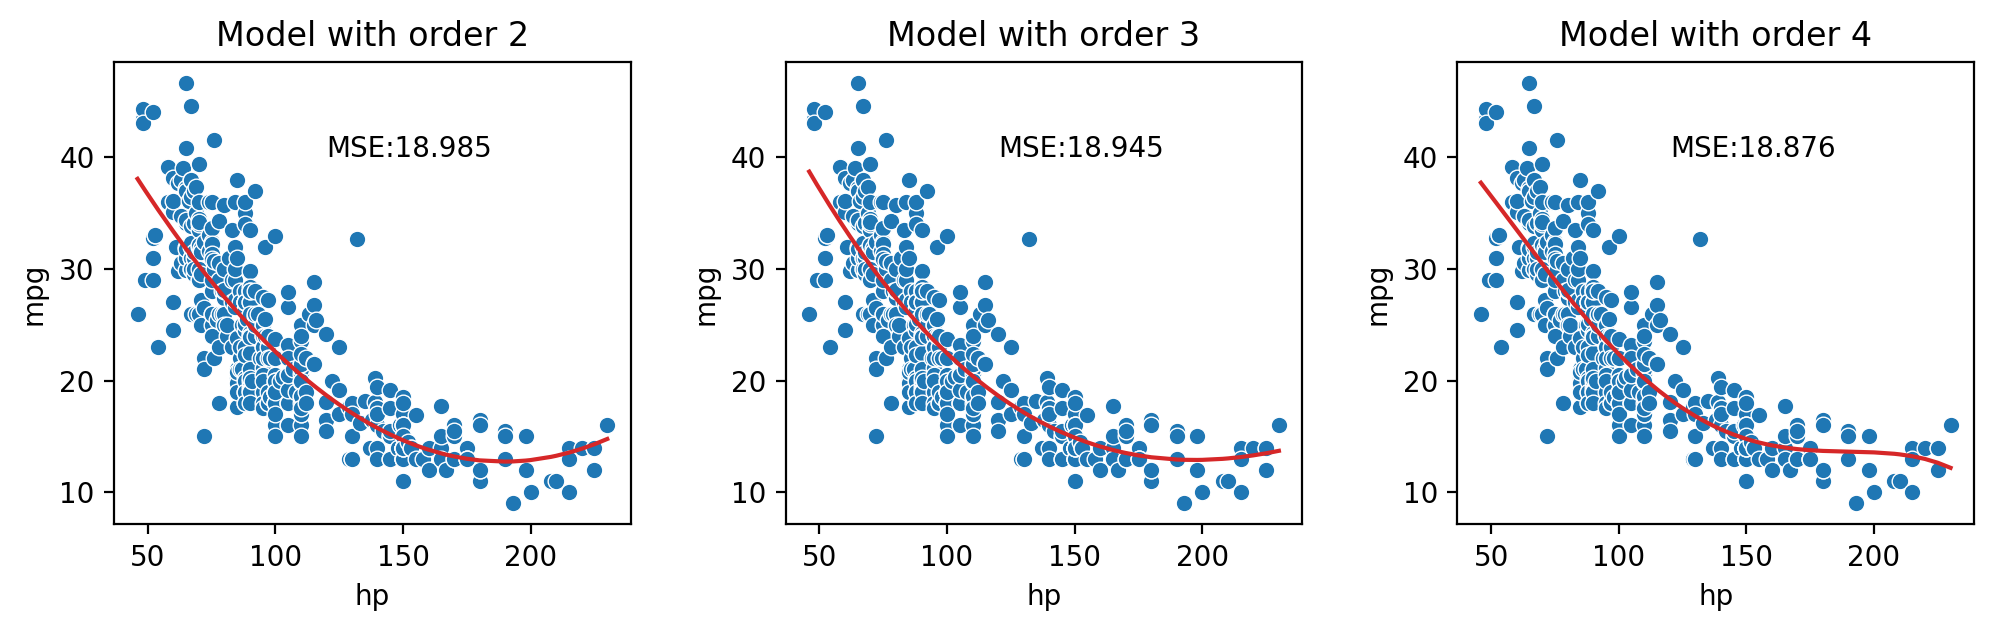

In [67]:
fig, ax = plt.subplots(1,3,dpi=200,figsize=(12,3))

predictions_dict = {0: hp2_model_predictions, 1:hp3_model_predictions, 2:hp4_model_predictions}

for i in predictions_dict:
  ax[i].scatter(vehicles["hp"], vehicles["mpg"], edgecolor="white",lw=0.5)
  ax[i].plot(vehicles["hp"],predictions_dict[i], "tab:red")
  ax[i].set_title(f"Model with order {i+2}")
  ax[i].set_xlabel("hp")
  ax[i].set_ylabel("mpg")
  ax[i].annotate(f"MSE:{np.round(mse(vehicles['mpg'], predictions_dict[i]),3)}", (120,40))

plt.subplots_adjust(wspace=0.3);

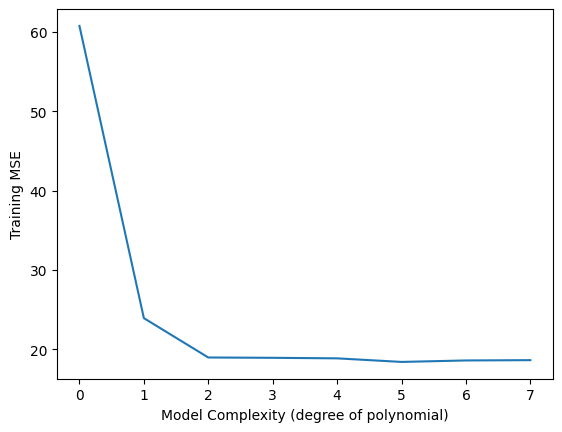

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def fit_model_dataset(degree, dataset):
    pipelined_model = Pipeline([
          ('polynomial_transformation', PolynomialFeatures(degree)),
          ('linear_regression', LinearRegression())
        ])

    pipelined_model.fit(dataset[["hp"]], dataset["mpg"])
    return mse(dataset['mpg'], pipelined_model.predict(dataset[["hp"]]))

errors = [fit_model_dataset(degree, vehicles) for degree in range(0,8)]
MSEs_and_k = pd.DataFrame({"k": range(0,8), "MSE": errors})

plt.plot(range(0,8), errors)
plt.xlabel("Model Complexity (degree of polynomial)")
plt.ylabel("Training MSE");




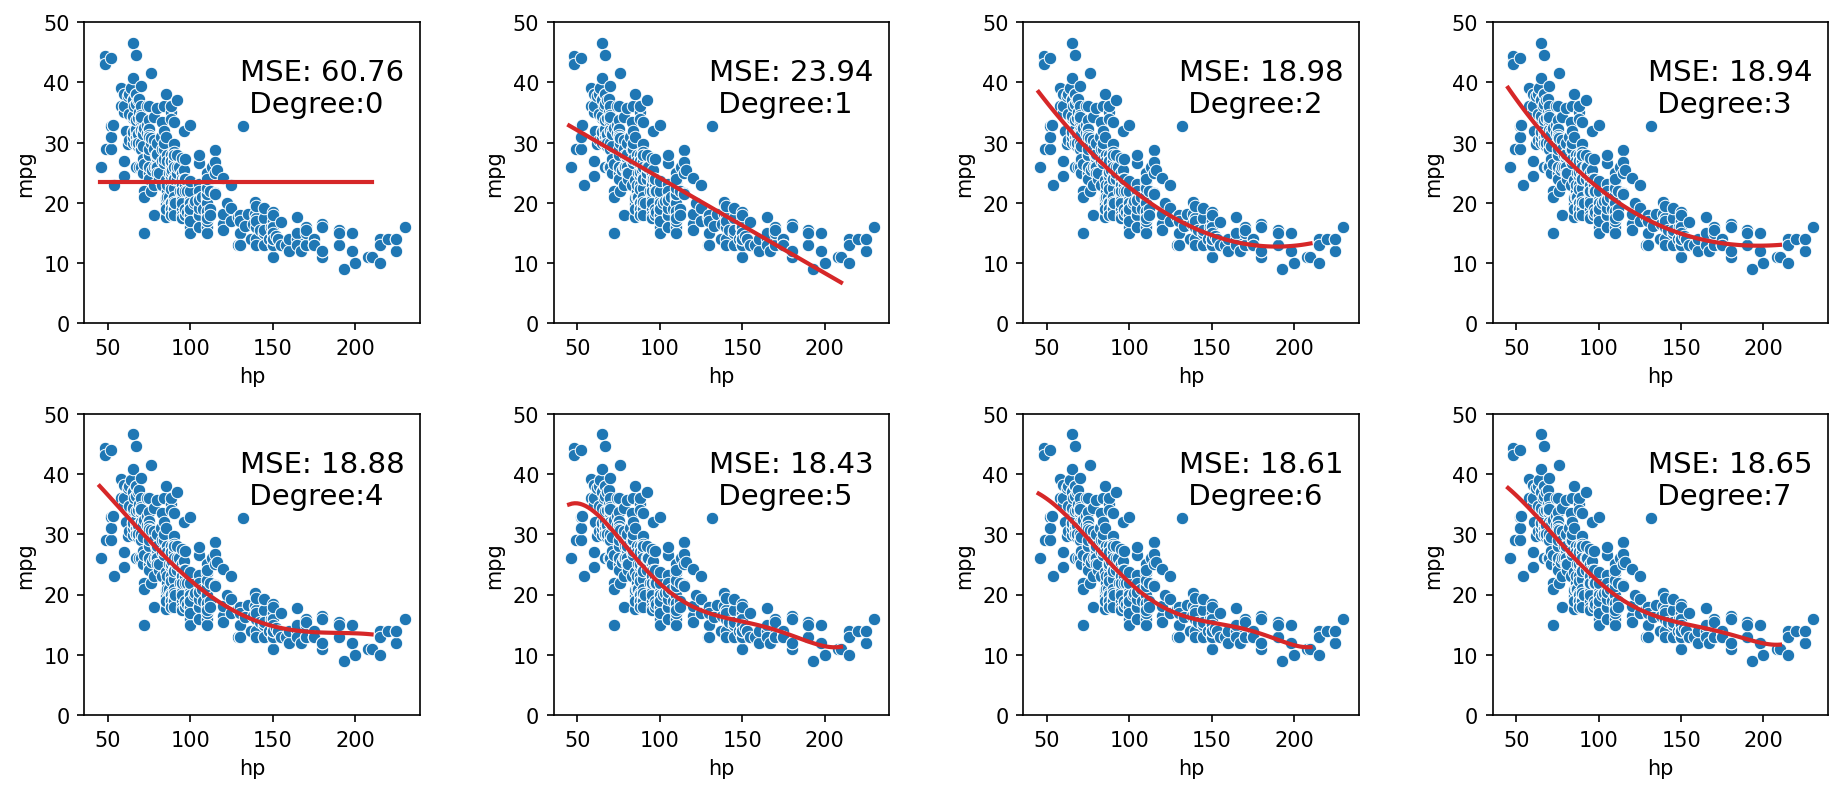

In [72]:
def plot_degree_k_model(k, MSEs_and_k, axs):
  pipelined_model = Pipeline([
      ('poly_transform', PolynomialFeatures(degree = k)),
      ('regression', LinearRegression(fit_intercept = True))
  ])

  pipelined_model.fit(vehicles[["hp"]],vehicles["mpg"])

  row = k // 4
  col = k % 4
  ax= axs[row,col]

  sns.scatterplot(data=vehicles, x='hp', y='mpg',ax=ax)

  x_range = np.linspace(45,210,100).reshape(-1,1)
  ax.plot(x_range, pipelined_model.predict(pd.DataFrame(x_range,columns=['hp'])),c='tab:red', linewidth=2)

  ax.set_ylim((0,50))
  mse_str= f"MSE: {MSEs_and_k.loc[k,'MSE']:.4}\n Degree:{k}"
  ax.text(130, 35, mse_str, dict(size=14))

fig = plt.figure(figsize=(15,6),dpi=150)
axs = fig.subplots(nrows=2, ncols=4)

for k in range (8):
  plot_degree_k_model(k, MSEs_and_k,axs)
fig.subplots_adjust(wspace=0.4,hspace=0.3)

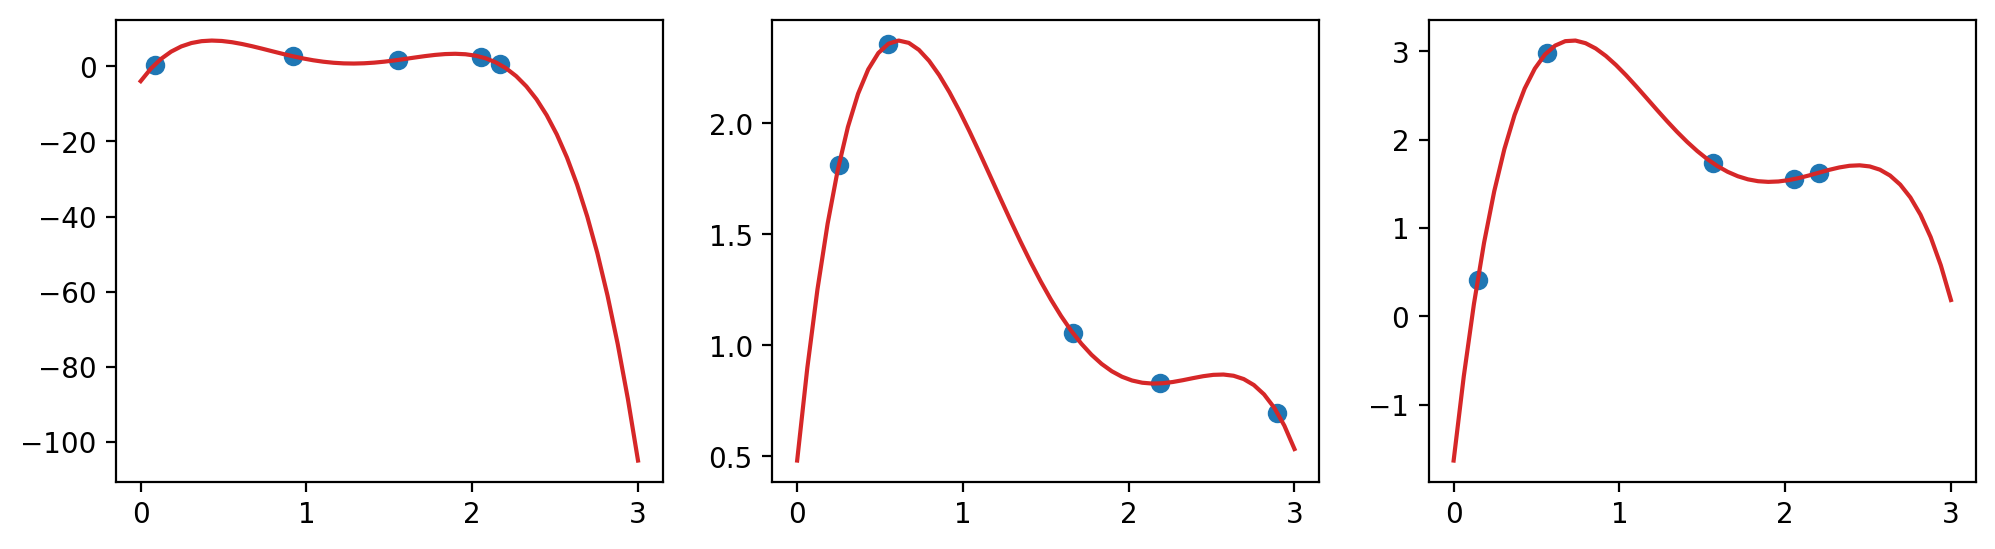

In [73]:
np.random.seed(101)

fig,ax = plt.subplots(1,3,dpi=200,figsize=(12,3))

for i in range(0,3):
    points = 3*np.random.uniform(size=(5,2))

    polynomial_model = Pipeline([
              ('polynomial_transformation', PolynomialFeatures(4)),
              ('linear_regression', LinearRegression())
          ])

    polynomial_model.fit(points[:,[0]], points[:,1])

    ax[i].scatter(points[:,0], points[:,1])

    xs = np.linspace(0,3)
    ax[i].plot(xs, polynomial_model.predict(xs[:,np.newaxis]), c="tab:red");


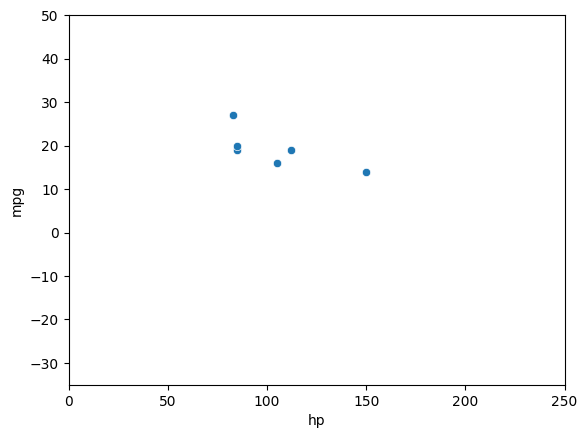

In [74]:
np.random.seed(100)

sample_6 = vehicles.sample(6)

sns.scatterplot(data=sample_6,x="hp",y="mpg")
plt.ylim(-35,50)
plt.xlim(0,250);

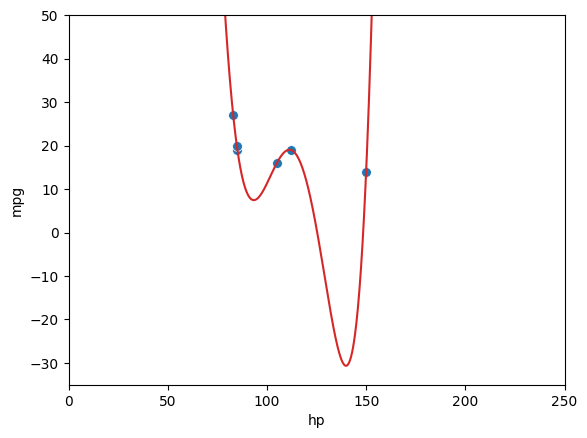

In [78]:
degree_5_model = Pipeline([
                ('polynomial_transformation', PolynomialFeatures(5)),
                ('linear_regression', LinearRegression())
            ])

degree_5_model.fit(sample_6[["hp"]], sample_6["mpg"])
xs = np.linspace(0,250,1000)
degree_5_model_predictions = degree_5_model.predict(xs[:, np.newaxis])

plt.plot(xs, degree_5_model_predictions, c = "tab:red")
sns.scatterplot(data=sample_6, x="hp", y="mpg", s=50)
plt.ylim(-35, 50)
plt.xlim(0,250);

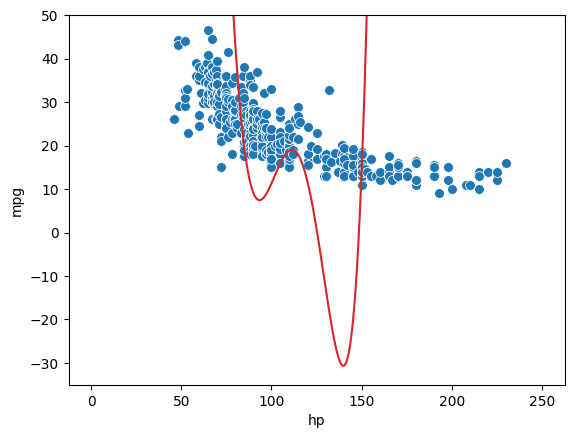

In [79]:
plt.plot(xs,degree_5_model_predictions, c="tab:red")
sns.scatterplot(data=vehicles,x="hp",y="mpg",s=50)
plt.ylim(-35,50);

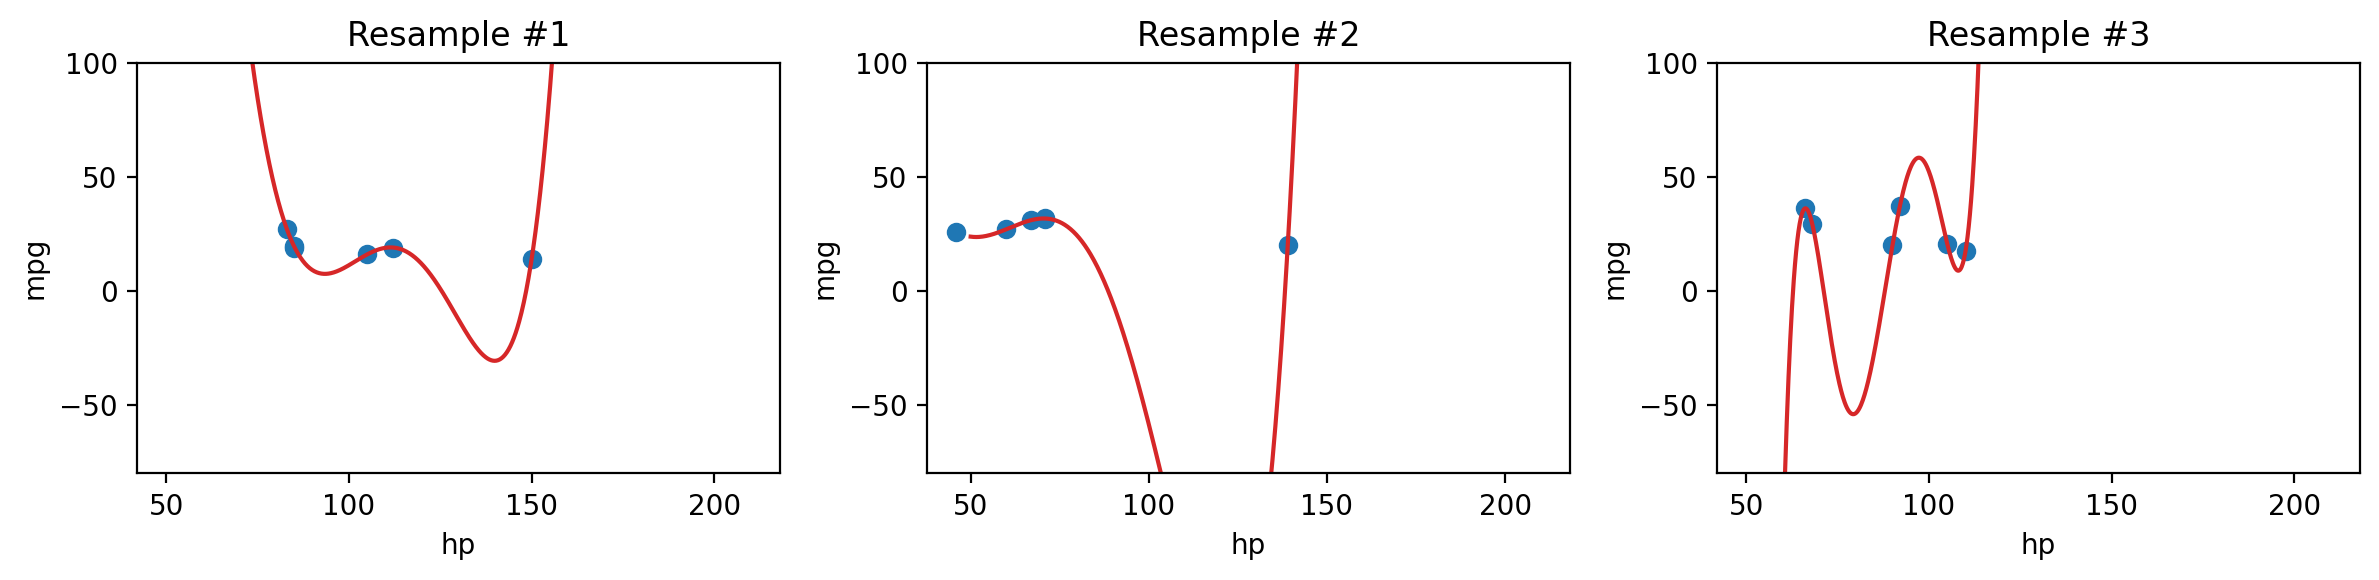

In [80]:
np.random.seed(100)

fig, ax=plt.subplots(1,3,dpi=200,figsize=(12,3))

for i in range(0,3):
  sample=vehicles.sample(6)

  polynomial_model=Pipeline([
        ('polynomial_transformation', PolynomialFeatures(5)),
        ('linear_regression', LinearRegression())
      ])

  polynomial_model.fit(sample[["hp"]], sample["mpg"])

  ax[i].scatter(sample[["hp"]], sample["mpg"])

  xs = np.linspace(50,210,1000)
  ax[i].plot(xs,polynomial_model.predict(xs[:,np.newaxis]), c="tab:red")
  ax[i].set_ylim(-80,100)
  ax[i].set_xlabel("hp")
  ax[i].set_ylabel("mpg")
  ax[i].set_title(f"Resample #{i+1}")

fig.tight_layout();

In [81]:
np.random.seed(16)

fig= px.scatter(vehicles,x="hp", y="mpg",width=800,height=600)

for i in range(0,3):
  sample = vehicles.sample(6).sort_values("hp")

  polynomil_model = Pipeline([
      ('polynomial_transformation', PolynomialFeatures(5)),
      ('linear_regression', LinearRegression())
    ])

  polynomial_model.fit(sample[["hp"]], sample["mpg"])

  name = f"Sample{i+1}"
  fig.add_trace(go.Scatter(x=sample["hp"], y=sample["mpg"],
    name = name, legendgroup=name, mode="markers", showlegend=False,
    marker_size=16,
    marker_color = px.colors.qualitative.Plotly[i+1]))
  xs = np.linspace(10,250,1000)
  fig.add_trace(go.Scatter(x=xs,
    y=polynomial_model.predict(xs[:,np.newaxis]),
    name = name, legendgroup=name, mode="lines",
    line_color=px.colors.qualitative.Plotly[i+1]))

fig.update_yaxes(range=[0,50])